<a href="https://colab.research.google.com/github/EDC21/Deep-Learning/blob/master/Examples%20from%20%E3%80%8AHands-on%20ML%E3%80%8B/Chapter%2010-Intro%20to%20ANN%20with%20Keras/Example_2_Building_a_Regression_MLP_Using_the_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tackling California housing problem using a regression neural network

In [19]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

# Load the dataset


In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

# Build,train,evaluate a regression MLP and make predictions


The output layer only need one single neuron and there is no use of activation function, and the loss function is the mean squared error.

In [24]:
model = keras.models.Sequential([
     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
     keras.layers.Dense(1)                            
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
            validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6440 - val_loss: 0.8302
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7308 - val_loss: 0.6836
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6501 - val_loss: 0.6443
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6147 - val_loss: 0.6199
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5895 - val_loss: 0.5975
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5689 - val_loss: 0.5783
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5521 - val_loss: 0.5630
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5378 - val_loss: 0.5493
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5260 - val_loss: 0.5382
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5161 - val_loss: 0.5278

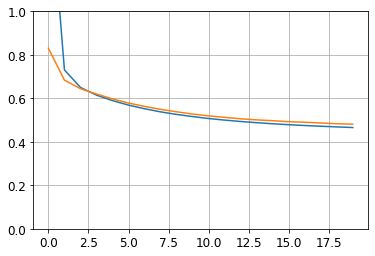

In [25]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
y_pred

array([[0.55015427],
       [1.5467417 ],
       [2.836376  ]], dtype=float32)